<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/soldier_race_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_m = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding='latin-1')
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
df_f = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df_m.shape

(4082, 108)

In [ ]:
df_f.shape

(1986, 108)

In [ ]:
df = pd.concat([df_m, df_f], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [ ]:
df.shape

(6068, 109)

In [ ]:
df2 = df.copy()

In [ ]:
df.info(verbose= True) # Verbose enables to see all the feature if there are too many features. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [ ]:
drop_list = []
for col in df:
  if df[col].isnull().sum()>1800:
    print(f"{col}={df[col].isnull().sum()}")
    drop_list.append(col),
drop_list

subjectid=1986
Ethnicity=4647
SubjectId=4082


['subjectid', 'Ethnicity', 'SubjectId']

As a general approah for the dataframes which columns with too many (1/3) missing values it is better to drop these columns.

In [ ]:
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df["Heightin"].value_counts()

69    628
70    573
71    557
66    554
68    532
67    519
72    478
64    386
65    324
73    291
63    274
74    236
62    229
75    117
61    102
60     83
76     68
77     36
59     35
78     15
80      7
57      6
79      5
58      5
56      3
81      2
87      1
86      1
94      1
Name: Heightin, dtype: int64

In [ ]:
# df.drop(columns= ("subjectid", "Ethnicity", "SubjectId", axis=1, inplace=True)  # as a second option to drop columns without for loop.

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.shape

(6068, 106)

In [ ]:
df.select_dtypes("object")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


In [ ]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [ ]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [ ]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


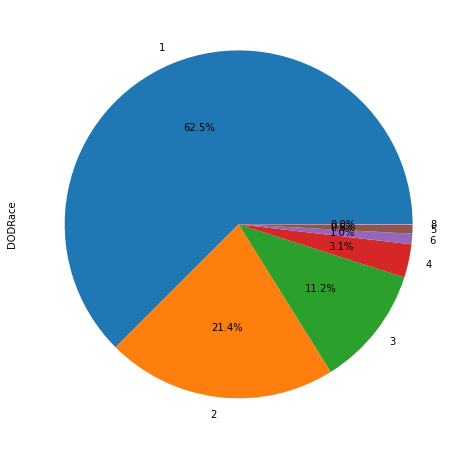

In [ ]:
print(df.DODRace.value_counts())
df.DODRace.value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

In [ ]:
df.DODRace = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

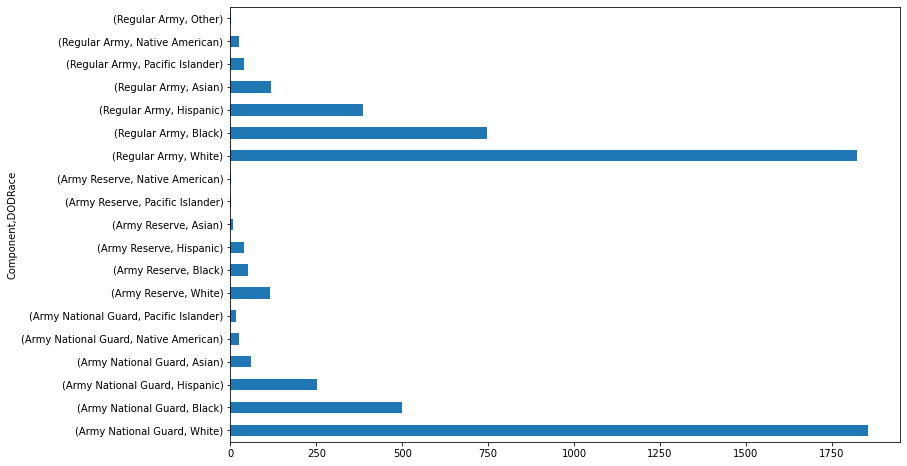

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(12,8))

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

There are three main ethnic class in the data. Rest of the classes have less than 500 observations. Model will not learn enough in these classes. I will drop these observations. Moreover, I did not get any insight from Component and Branch features. Because these fetaures have no effect on ethnicity. Self-reported features will also unnecessary since the relevant data included in another features.    

In [ ]:
df.drop(columns=["Component", "Branch", "Installation", "Date", "PrimaryMOS", "Weightlbs", "Heightin", "SubjectNumericRace"], axis=1, inplace =True)

In [ ]:
df.shape

(6068, 98)

In [ ]:
df.sample(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
3031,252,1421,322,220,1304,255,207,419,383,287,521,74,346,331,144,1046,266,869,620,507,414,1512,293,1077,253,1266,831,568,331,40,69,21,253,820,101,277,327,320,548,466,1097,85,199,192,150,563,201,343,71,344,386,1063,625,396,416,486,543,488,72,423,120,392,417,1401,123,425,262,1194,354,152,933,873,582,1777,1761,1425,1104,636,173,765,455,136,886,1701,515,312,915,242,400,1019,875,173,828,Male,California,Asian,34,Right hand


In [ ]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
df = df[(df.DODRace=="White") | (df.DODRace == "Black") | (df.DODRace== "Hispanic")]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

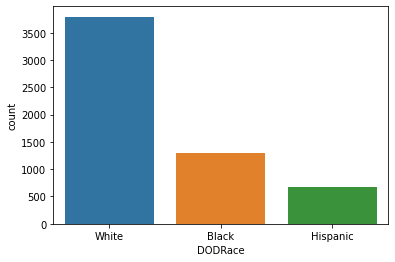

In [ ]:
sns.countplot(df.DODRace);

In [ ]:
df.shape

(5769, 98)

## Explore Data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


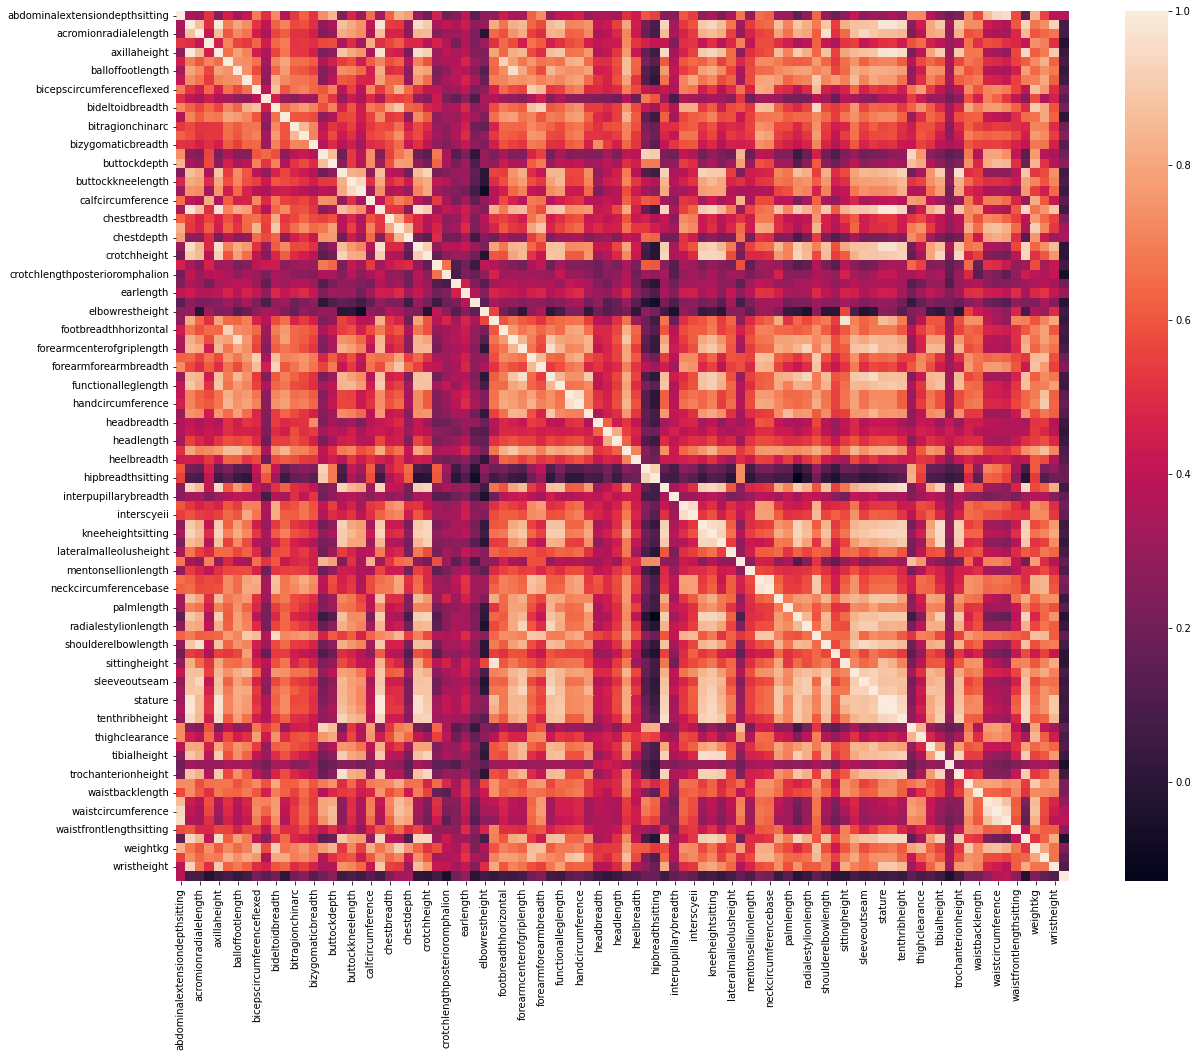

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr())

In [ ]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]>= .9 and df_temp[col][i] < 1) or (df_temp[col][i]<= -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                #print(f"multicolinearity alert in between {col} - {i}")

In [ ]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [ ]:
df_col.shape

(286, 2)

In [ ]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

I can see that there are lots of strongly correlated features which causes multicollinearity.



# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [ ]:
X = pd.get_dummies(data=X, drop_first= True) # in gradient descent model like logistic regression we need to convert dummies features. We do not need to get_dummies in tree based models.

In [ ]:
X.shape

(5769, 232)

In [ ]:
y.shape

(5769,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [283]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [284]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]  # in default model class_weight=None. Using balanced class weight get better recall scores for hispanic class.
pipe_log_model = Pipeline(steps=operations)

In [285]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



<Figure size 864x576 with 0 Axes>

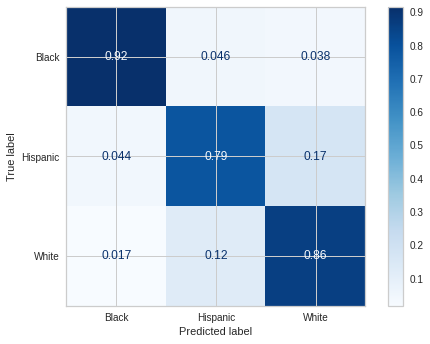

In [286]:
plt.figure(figsize=(12,8))
plot_confusion_matrix(pipe_log_model, X_test, y_test, cmap="Blues", normalize="true");

Data is imbalance and Black class have good scores. But white and Hispanic classes having noise. Especially Hispanic class have to many false negatives. Therfore I will focus on these White and Hispanic classes.

In [287]:
scoring = {"f1_hispanic_white" : make_scorer(f1_score, average = "macro", labels =["Hispanic", "White"]),
           "precision_hispanic_white" : make_scorer(precision_score, average = "macro", labels =["Hispanic", "White"]),
           "recall_hispanic_white" : make_scorer(recall_score, average = "macro", labels =["Hispanic", "White"])}

In [288]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic_white           0.751111
test_precision_hispanic_white    0.724844
test_recall_hispanic_white       0.810313
dtype: float64

In [290]:
y_pred = pipe_log_model.predict(X_test)

In [291]:
log_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
log_model_score

0.7593077162042678

### Logistic Model GridsearchCV

In [ ]:
f1_hispanic_white =  make_scorer(f1_score, average="macro", labels=["Hispanic", "White"])

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]  
model = Pipeline(steps=operations)

In [ ]:
penalty = ["l1", "l2"]
C = [0.1, 1, 3, 5, 10]

param_grid = {
    "log__C": [0.1, 1, 3, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [ ]:
log_grid_model = GridSearchCV(model, param_grid, scoring=f1_hispanic_white,  n_jobs=-1,  verbose=3, cv=5) 

In [ ]:
log_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 1, 3, 5, 10],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(f1_score, average=macro, labels=['Hispanic', 'White']),
             verbose=3)

In [ ]:
log_grid_model.best_params_

{'log__C': 3, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [ ]:
log_grid_model.best_score_

0.79232026089793

In [ ]:
y_pred = log_grid_model.predict(X_test)
y_pred

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

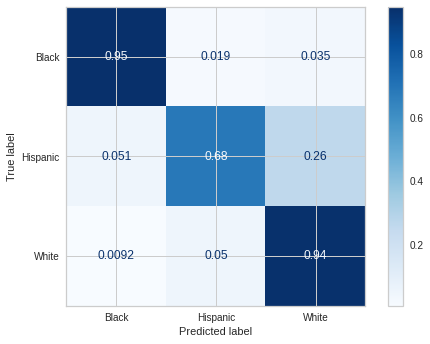

In [357]:
plot_confusion_matrix(log_grid_model, X_test, y_test, cmap="Blues", normalize="true");

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[246   5   9]
 [  7  93  36]
 [  7  38 713]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       260
    Hispanic       0.68      0.68      0.68       136
       White       0.94      0.94      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 984   13   41]
 [  26  387  130]
 [  40  143 2851]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94      1038
    Hispanic       0.71      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.87      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
! pip install yellowbrick

     |████████████████████████████████| 271 kB 8.5 MB/s 
     |████████████████████████████████| 14.8 MB 52.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


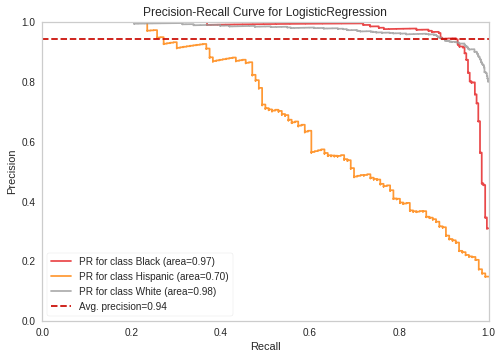

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve # Due to the imbalanced data PrecisionRecallCurve suits better than ROC_AUC
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
viz.score_

{'Black': 0.9719147716366067,
 'Hispanic': 0.7003208707770803,
 'White': 0.9758769497933704,
 'micro': 0.9418114073798092}

In [ ]:
y_pred = log_grid_model.predict(X_test)

In [ ]:
log_grig_viz_score = viz.score_["Hispanic"]
log_grig_viz_score

0.7003208707770803

In [ ]:
log_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])  # In multiclass classification average and labels must be defined.
log_grid_model_score

0.8122283873971752

## 2. SVC

### Vanilla SVC model 

In [266]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced',max_iter=10000,random_state=42))]  
pipe_svc_model = Pipeline(steps=operations)

In [267]:
pipe_svc_model.fit(X_train,y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [  6 105  25]
 [ 10 104 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   39   42]
 [  23  444   76]
 [  61  419 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.82      0.61       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



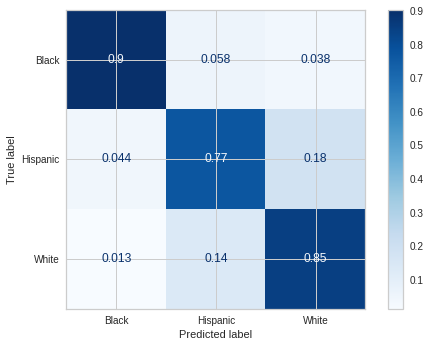

In [268]:
plot_confusion_matrix(pipe_svc_model, X_test, y_test, normalize="true", cmap="Blues");

In [260]:
scoring = {"f1_hispanic_white" : make_scorer(f1_score, average = "macro", labels =["Hispanic", "White"]),
           "precision_hispanic_white" : make_scorer(precision_score, average = "macro", labels =["Hispanic", "White"]),
           "recall_hispanic_white" : make_scorer(recall_score, average = "macro", labels =["Hispanic", "White"])}

In [264]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced',max_iter=10000,random_state=42))]  
pipe_svc_model = Pipeline(steps=operations)
scores = cross_validate(pipe_svc_model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic_white           0.732339
test_precision_hispanic_white    0.704381
test_recall_hispanic_white       0.802258
dtype: float64

In [269]:
svc_model_score = df_scores.mean()[2:3]
svc_model_score

test_f1_hispanic_white    0.732339
dtype: float64

In [271]:
y_pred = pipe_svc_model.predict(X_test)

In [272]:
svc_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
svc_model_score

0.7398225469728601

###  SVC Model GridsearchCV

In [ ]:
param_grid = {
    'svc__C': [1,3,5],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)

svc_grid_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=f1_hispanic_white,
                              n_jobs=-1)

In [ ]:
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 3, 5],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(f1_score, average=macro, labels=['Hispanic', 'White']),
             verbose=3)

In [ ]:
svc_grid_model.best_params_

{'svc__C': 3, 'svc__gamma': 0.1}

In [ ]:
svc_grid_model.best_score_

0.7544307311622829

In [ ]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  13  10]
 [  8 105  23]
 [  9  94 655]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.77      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 990   22   26]
 [  12  483   48]
 [  45  290 2699]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.61      0.89      0.72       543
       White       0.97      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



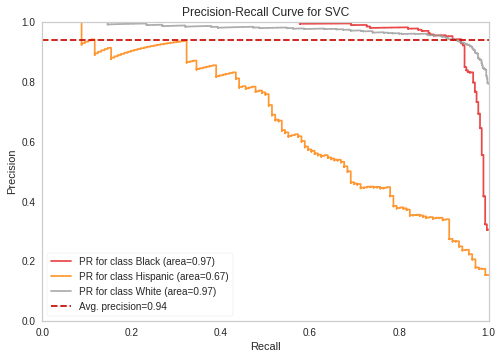

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = svc_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])
svc_recall = recall_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])

In [ ]:
f1_hispanic_white =  make_scorer(f1_score, average="macro", labels=["Hispanic", "White"])

In [ ]:
svc_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
svc_grid_model_score

0.7546978585396098

## 3. RF

In [201]:
from sklearn.preprocessing import OrdinalEncoder   # We do not use dummy features in tree based models. We need to convert categoric features by OrdinalEncoder.

In [202]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [203]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [204]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [205]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify =y)

In [206]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [244]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [245]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [246]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   5 124]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.71      0.04      0.07       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



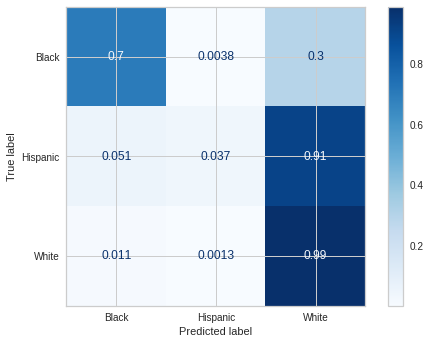

In [247]:
plot_confusion_matrix(rf_model, X_test2, y_test2, cmap = "Blues", normalize = "true");

In [248]:
f1_hispanic_white =  make_scorer(f1_score, average="macro", labels=["Hispanic", "White"])

In [249]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = f1_hispanic_white, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.479562
dtype: float64

In [250]:
rf_model_score = df_scores.mean()[2:]
rf_model_score

test_score    0.479562
dtype: float64

In [251]:
y_pred2 = rf_model.predict(X_test2)

In [252]:
rf_model_score = f1_score(y_test2, y_pred2, average="macro", labels=["Hispanic", "White"]) 
rf_model_score

0.47348962512896936

Random forest model clearly seems to have an overfitting problem. Therefore I will change the default parameters.

### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[200,400],
             'max_depth':[10,15,20], 'min_samples_split': [18, 22], 'max_features': ['auto', None, 15, 20]}

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=f1_hispanic_white,
                             n_jobs=-1)

In [ ]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', None, 15, 20],
                         'min_samples_split': [18, 22],
                         'n_estimators': [200, 400]},
             scoring=make_scorer(f1_score, average=macro, labels=['Hispanic', 'White']),
             verbose=3)

In [ ]:
rf_grid_model.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_split': 22,
 'n_estimators': 200}

In [ ]:
rf_grid_model.best_score_

0.6268525863402988

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[213  12  35]
 [ 13  57  66]
 [ 38  48 672]]
              precision    recall  f1-score   support

       Black       0.81      0.82      0.81       260
    Hispanic       0.49      0.42      0.45       136
       White       0.87      0.89      0.88       758

    accuracy                           0.82      1154
   macro avg       0.72      0.71      0.71      1154
weighted avg       0.81      0.82      0.81      1154


Train_Set
[[ 995    5   38]
 [   6  504   33]
 [  45   66 2923]]
              precision    recall  f1-score   support

       Black       0.95      0.96      0.95      1038
    Hispanic       0.88      0.93      0.90       543
       White       0.98      0.96      0.97      3034

    accuracy                           0.96      4615
   macro avg       0.93      0.95      0.94      4615
weighted avg       0.96      0.96      0.96      4615



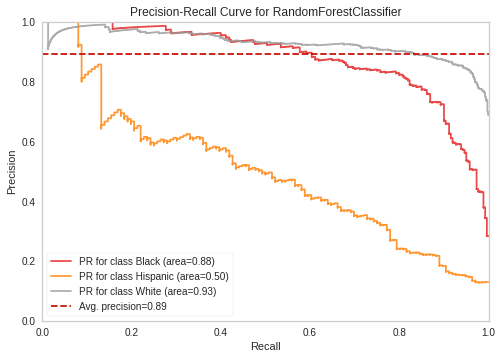

In [ ]:
model = RandomForestClassifier(class_weight="balanced", max_features=None, random_state=101, max_depth=10, n_estimators = 200, min_samples_split=22)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

In [ ]:
rf_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
rf_grid_model_score

0.6642252473905557

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

In [ ]:
rf_AP

0.4995599138696278

In [ ]:
rf_f1

array([0.45059289])

In [ ]:
rf_recall

array([0.41911765])

## 4. XGBoost

### Vanilla XGBoost Model

In [232]:
xgb_model = XGBClassifier(random_state=42)

In [233]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [234]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=42)

In [235]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[225  18  17]
 [ 10  93  33]
 [ 26  96 636]]
              precision    recall  f1-score   support

       Black       0.86      0.87      0.86       260
    Hispanic       0.45      0.68      0.54       136
       White       0.93      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[ 977   23   38]
 [  20  468   55]
 [  96  314 2624]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1038
    Hispanic       0.58      0.86      0.69       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615



In [237]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic_white           0.683092
test_precision_hispanic_white    0.668093
test_recall_hispanic_white       0.717665
dtype: float64

In [240]:
y_pred2 = xgb_model.predict(X_test2)

In [241]:
xgb_model_score = f1_score(y_test2, y_pred2, average="macro", labels=["Hispanic", "White"]) 
xgb_model_score

0.711580239535466

### XGBoost Model GridsearchCV

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [ ]:
param_grid = {"n_estimators":[100, 200, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=f1_hispanic_white, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [138]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1}

In [139]:
xgb_grid_model.best_score_

0.7356933303943061

In [140]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231   8  21]
 [  9  77  50]
 [ 17  22 719]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.89       260
    Hispanic       0.72      0.57      0.63       136
       White       0.91      0.95      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.80      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   2    5 3027]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       0.99      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



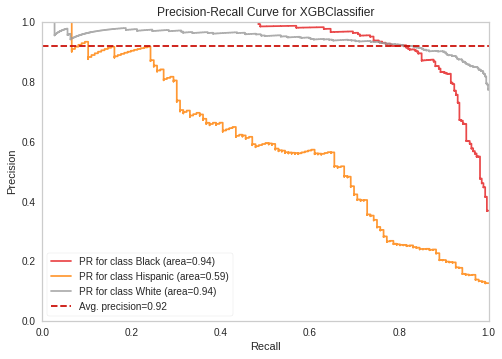

In [141]:
model = XGBClassifier(random_state=42, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [142]:
y_pred = xgb_grid_model.predict(X_test2)


In [143]:
xgb_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
xgb_grid_model_score

0.7813427122212653

In [144]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

In [146]:
xgb_AP

0.5878720819604221

In [147]:
xgb_f1

array([0.63374486])

In [148]:
xgb_recall 

array([0.56617647])

## Comparing Models

###Comparing GridSearchCV Models According to F1 Macro Average Score for Hispanic and White Classes

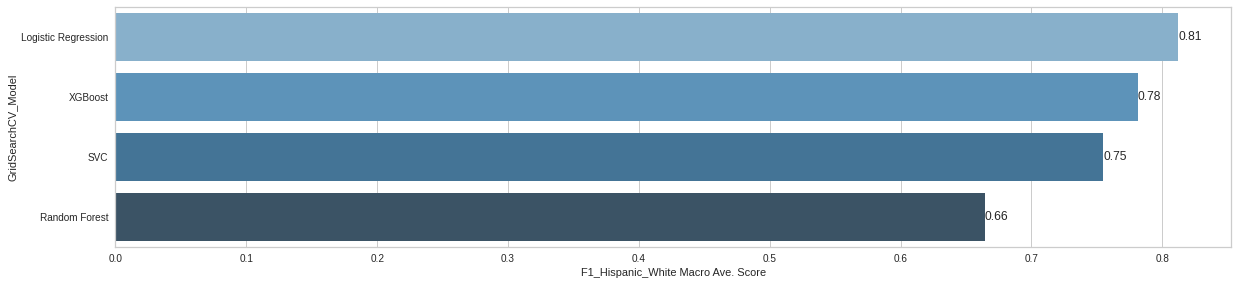

In [309]:
compare_grid_models = pd.DataFrame({"GridSearchCV_Model": ["Logistic Regression", "SVC",  "Random Forest", "XGBoost"],
                        "F1_Hispanic_White Macro Ave. Score": [log_grid_model_score, svc_grid_model_score, rf_grid_model_score, xgb_grid_model_score]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(20,15))
plt.subplot(311)
compare_grid_models = compare_grid_models.sort_values(by="F1_Hispanic_White Macro Ave. Score", ascending=False)
ax=sns.barplot(x="F1_Hispanic_White Macro Ave. Score", y="GridSearchCV_Model", data=compare_grid_models, palette="Blues_d")
labels(ax)
plt.show()

Comparing Vanilla Models According to F1 Macro Average Score for Hispanic and White Classes

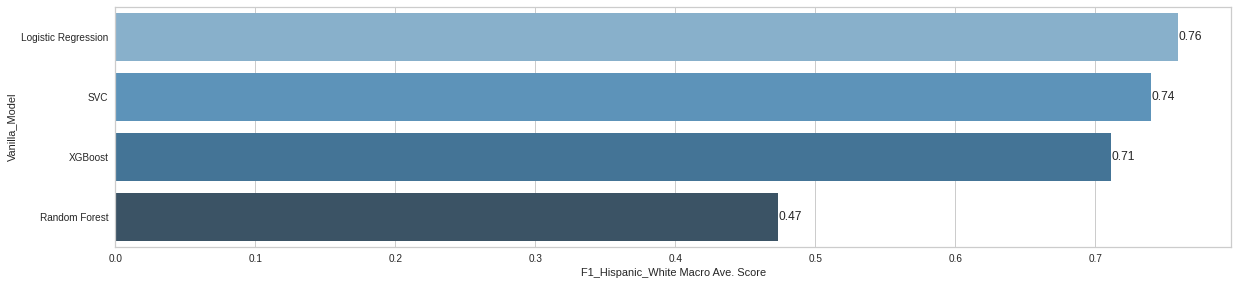

In [311]:
compare_vanilla_models = pd.DataFrame({"Vanilla_Model": ["Logistic Regression", "SVC",  "Random Forest", "XGBoost"],
                        "F1_Hispanic_White Macro Ave. Score": [log_model_score, svc_model_score, rf_model_score, xgb_model_score]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(20,15))
plt.subplot(311)
compare_vanilla_models = compare_vanilla_models.sort_values(by="F1_Hispanic_White Macro Ave. Score", ascending=False)
ax=sns.barplot(x="F1_Hispanic_White Macro Ave. Score", y="Vanilla_Model", data=compare_vanilla_models, palette="Blues_d")
labels(ax)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

It is obvious that Logistic Regression gives the best scores both in vanilla and gridsearchcv models. Therefore, I choose Logistic Regression GridSeachCV model as the final model.

In [348]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', C = 3, penalty= 'l2', solver = 'liblinear', max_iter=10000,random_state=42))] # best parameters 
final_model = Pipeline(steps=operations)

In [351]:
final_model.fit(X_train,y_train)
eval_metric(final_model, X_train, y_train, X_test, y_test)

Test_Set
[[244   6  10]
 [  4  93  39]
 [  9  38 711]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94       260
    Hispanic       0.68      0.68      0.68       136
       White       0.94      0.94      0.94       758

    accuracy                           0.91      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   15   50]
 [  25  380  138]
 [  47  135 2852]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.72      0.70      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



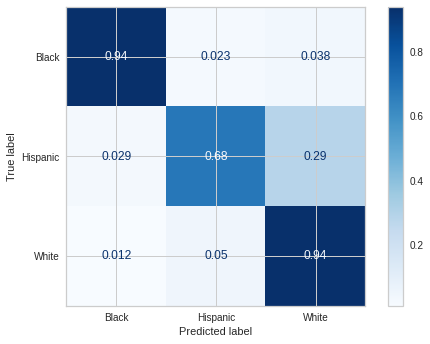

In [356]:
plot_confusion_matrix(final_model, X_test, y_test, cmap = "Blues", normalize = "true");

Final model has very good scores both in Black and White classes without overfitting. But Hispanic class still have many false negatives.

In [358]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=3, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='liblinear'))])

In [359]:
final_model.predict(X.loc[[50]])

array(['White'], dtype=object)

In [360]:
y[50]

'White'

In [361]:
final_model.predict(X.loc[[2045]])

array(['Hispanic'], dtype=object)

In [362]:
y[2045]

'Hispanic'

In [363]:
final_model.predict(X.loc[[4100]])

array(['Black'], dtype=object)

In [364]:
y[4100]

'Black'

In [365]:
final_model.predict(X.loc[[5500]])

array(['White'], dtype=object)

In [366]:
y[5500]

'White'

The following scores (matthews_corrcoef and cohen_kappa_score) are benefiacial for imbalanced data. It gives a general performance of the model rather than a specific score or spesific class. According to these scores I can say that final model has 0.85 score in terms of general performance.

In [369]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8457430163209547

In [370]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8457150496902714

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [371]:
!pip install imblearn

In [379]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline  # This library is different than Sklearn library. Because Sklearn pipeline works with only fit, transform and predict  

In [373]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [374]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [375]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [376]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [377]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [380]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [381]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [382]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [386]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(class_weight='balanced',max_iter=10000,random_state=101))]

In [387]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [388]:
smote_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

In [389]:
eval_metric(smote_pipeline_2, X_train, y_train, X_test, y_test)

Test_Set
[[236  11  13]
 [  8  98  30]
 [ 13  66 679]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91       260
    Hispanic       0.56      0.72      0.63       136
       White       0.94      0.90      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.84      0.82      1154
weighted avg       0.89      0.88      0.88      1154


Train_Set
[[ 966   30   42]
 [  32  382  129]
 [  69  256 2709]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.57      0.70      0.63       543
       White       0.94      0.89      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.84      0.82      4615
weighted avg       0.89      0.88      0.88      4615



In [391]:
model = imbpipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = f1_hispanic_white, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.748544
dtype: float64

In [398]:
svc_model_score # without smote score

0.7398225469728601

## Xgboost Over/ Under Sampling

In [392]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("xgb", XGBClassifier(class_weight='balanced',max_iter=10000,random_state=101))]

In [393]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [394]:
smote_pipeline_2.fit(X_train2, y_train2)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(class_weight='balanced', max_iter=10000,
                               objective='multi:softprob', random_state=101))])

In [396]:
eval_metric(smote_pipeline_2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[209  18  33]
 [  6  71  59]
 [ 10  39 709]]
              precision    recall  f1-score   support

       Black       0.93      0.80      0.86       260
    Hispanic       0.55      0.52      0.54       136
       White       0.89      0.94      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.75      0.77      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set
[[ 918   27   93]
 [  26  345  172]
 [  33  120 2881]]
              precision    recall  f1-score   support

       Black       0.94      0.88      0.91      1038
    Hispanic       0.70      0.64      0.67       543
       White       0.92      0.95      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.82      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [397]:
model = imbpipeline(steps=operations)
scores = cross_validate(model, X_train2, y_train2, scoring = f1_hispanic_white, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.692206
dtype: float64

In [399]:
xgb_model_score # without smote score

0.711580239535466

Implementing Smote to XGBoost results a bit increase in F1 Score. On the other hand in SVC it results a bit decrease in the same score. In conclusion, smote implementation does not have a significant effect on our models.  

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
!pip install shap

In [412]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [413]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [415]:
model_shap2 = LogisticRegression(class_weight='balanced', C = 3, penalty= 'l1', solver = 'liblinear', max_iter=10000,random_state=42)  # It is very important to use Lasso (l1) in shap models. 
model_shap2.fit(X_train_scaled, y_train)

LogisticRegression(C=3, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')

In [417]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test) # with saga parameter

Test_Set
[[239  12   9]
 [  7 103  26]
 [ 16  93 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 969   38   31]
 [  18  452   73]
 [  77  350 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [418]:
eval_metric(model_shap2, X_train_scaled, y_train, X_test_scaled, y_test) # with liblinear parameter and C=3 parameter

Test_Set
[[246   5   9]
 [  7  93  36]
 [  7  38 713]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       260
    Hispanic       0.68      0.68      0.68       136
       White       0.94      0.94      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 984   13   41]
 [  26  387  130]
 [  40  143 2851]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94      1038
    Hispanic       0.71      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.87      4615
weighted avg       0.91      0.91      0.91      4615



###Shap for a specific row

In [473]:
import shap
explainer = shap.Explainer(model_shap2,X_train_scaled)
start_index = 555
end_index = 556
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [ ]:
shap_values

In [475]:
print(shap_values[0].shape)

(1, 232)


In [476]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap2.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: White


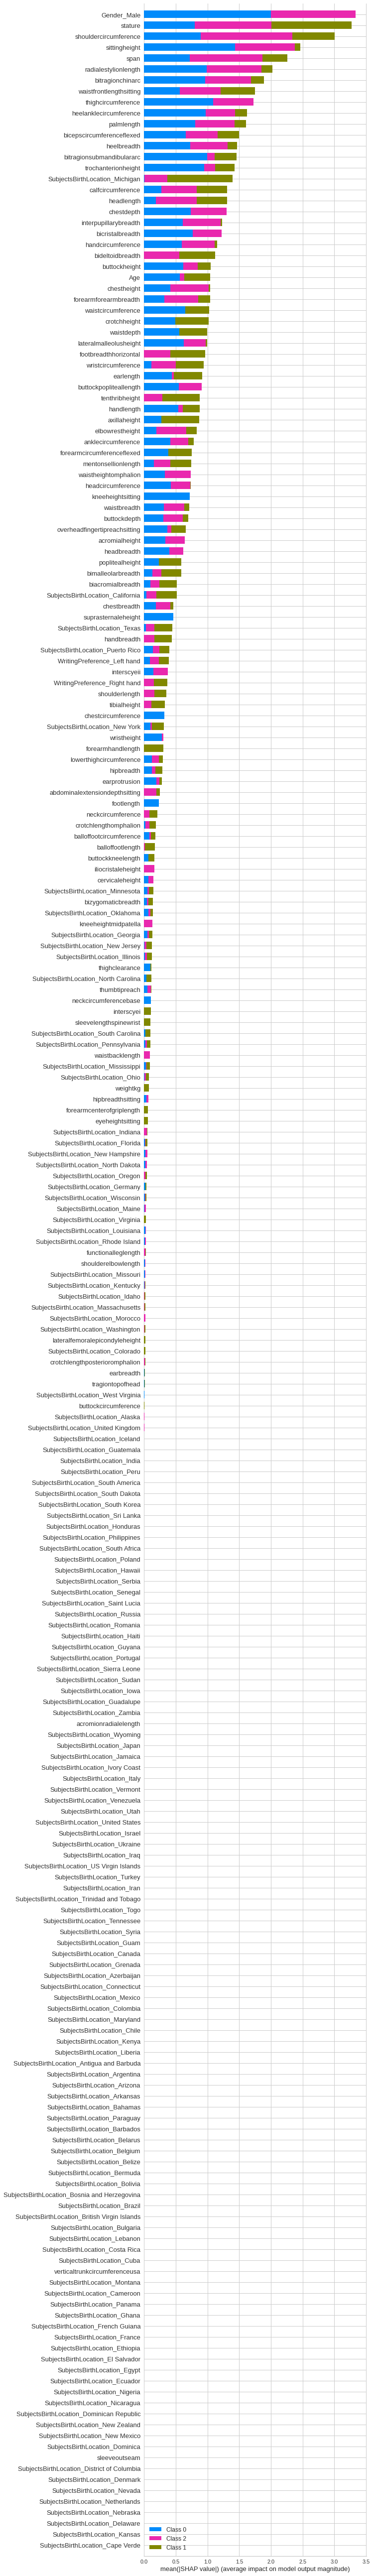

In [477]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

## Shap values for all data

In [441]:
explainer = shap.Explainer(model_shap2, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

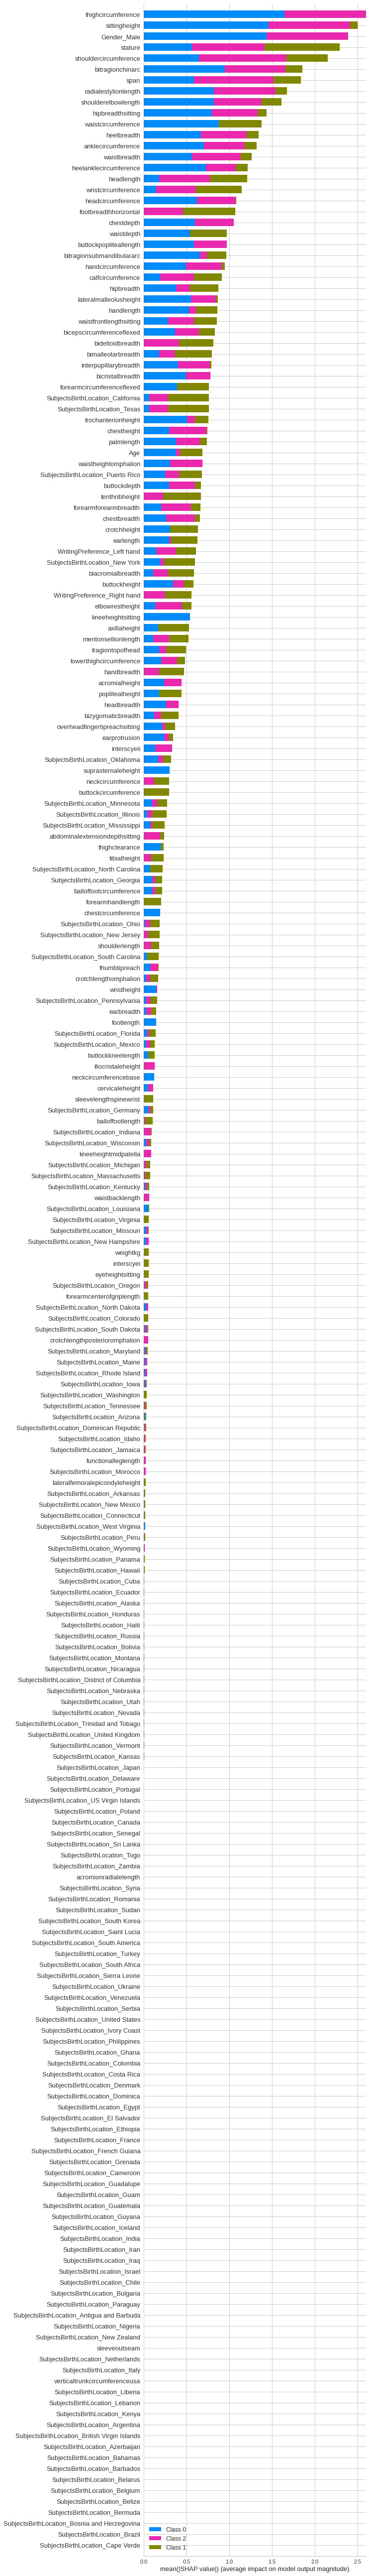

In [442]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

**Class 0** : Black (Blue Color)           **Class 1** : Hispanic (Green Color)        **Class 2** :  White (Pink Color)

In [446]:
hispanic_features = ["SubjectsBirthLocation",  'forearmhandlength', 'sittingheight', 'stature', "shouldercircumference", 'waistcircumference',
            'footbreadthhorizontal',  'headlength', 'bideltoidbreadth', 'tenthribheight', 'earlength', 'poplitealheight', 'waistdepth', 'biacromialbreadth', 'WritingPreference', 'axillaheight', 'handbreadth', 'tragiontopofhead', 'crotchheight','buttockcircumference' 
            , 'poplitealheight', 'neckcircumferencebase', 'bizygomaticbreadth', 'sleevelengthspinewrist', 'balloffootcircumference', "Age"]

In [ ]:
#list(X.columns)

In [447]:
X3 = df[hispanic_features]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [448]:
X3.shape

(5769, 161)

In [449]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

In [457]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', C = 3, penalty= 'l1', solver = 'liblinear', max_iter=10000,random_state=42))]  # Using l1 is a must. In logistic regression we need to scale data. Because scaling is important for Feature Importance. In tree based models scaling is not important.
pipe_shap_model = Pipeline(steps=operations)

In [458]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=3, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [459]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[226  10  24]
 [ 11  79  46]
 [ 34  44 680]]
              precision    recall  f1-score   support

       Black       0.83      0.87      0.85       260
    Hispanic       0.59      0.58      0.59       136
       White       0.91      0.90      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.85      0.85      0.85      1154


Train_Set
[[ 883   31  124]
 [  31  364  148]
 [ 157  175 2702]]
              precision    recall  f1-score   support

       Black       0.82      0.85      0.84      1038
    Hispanic       0.64      0.67      0.65       543
       White       0.91      0.89      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.80      0.80      4615
weighted avg       0.86      0.86      0.86      4615



In [461]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = f1_hispanic_white, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.757571
dtype: float64

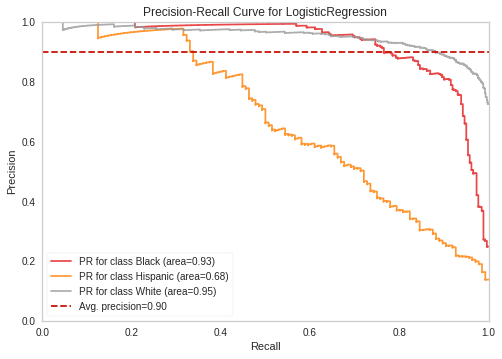

In [462]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

Implementing Shap to the Logistic Regression model results a decrease in the scores. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# BONUS
In this section I would like to compare self-reported height and weight data to the measured height and weight data. 

###HEIGHT COMPARISON

In [478]:
df_h = pd.concat([df2.Heightin, df2.stature], axis=1)

In [480]:
df_h.head()

,Heightin,stature
0,71,1776
1,68,1702
2,68,1735
3,66,1655
4,77,1914


In [481]:
df_h.isnull().sum()

Heightin    0
stature     0
dtype: int64

In [482]:
df_h.Heightin = df_h.Heightin*25.4  # to have same metrics converted inches to mm

In [483]:
df_h.head()

,Heightin,stature
0,1803.4,1776
1,1727.2,1702
2,1727.2,1735
3,1676.4,1655
4,1955.8,1914


In [484]:
df_h= df_h.astype("int") 

In [485]:
df_h.mean()

Heightin    1733.317568
stature     1714.406065
dtype: float64

In [486]:
height_diff = (df_h["Heightin"].mean()) - (df_h["stature"].mean())
height_diff

18.911502966381022

In [487]:
df_h = pd.concat([df.Gender, df_h], axis=1)

In [488]:
df_h["difference"] = df_h["Heightin"] - df_h["stature"]
df_h

,Gender,Heightin,stature,difference
0,Male,1803,1776,27
1,Male,1727,1702,25
2,Male,1727,1735,-8
3,Male,1676,1655,21
4,Male,1955,1914,41
...,...,...,...,...
6063,Female,1701,1687,14
6064,Female,1600,1613,-13
6065,Female,1676,1644,32
6066,Female,1600,1616,-16


In [491]:
df_h.difference.mean()

18.911502966381015

In [492]:
df_h.describe()

,Heightin,stature,difference
count,6068.000000,6068.000000,6068.000000
mean,1733.317568,1714.406065,18.911503
std,98.096451,90.015336,27.344458
min,1422.000000,1409.000000,-274.000000
25%,1676.000000,1651.750000,6.000000
50%,1727.000000,1719.000000,17.000000
75%,1803.000000,1779.000000,30.000000
max,2387.000000,1993.000000,612.000000


In [493]:
lower = df_h.difference.quantile(0.25)
lower

6.0

In [494]:
upper= df_h.difference.quantile(0.75)
upper

30.0

In [495]:
iqr = upper-lower

In [496]:
lower_limit = df_h.difference.quantile(0.25) - (1.5*iqr)
lower_limit

-30.0

In [497]:
upper_limit = df_h.difference.quantile(0.75) + (1.5*iqr)
upper_limit

66.0

In [498]:
drop_index = df_h[(df_h.difference>upper_limit)|(df_h.difference<lower_limit)].index

In [499]:
df_h.drop(index=drop_index, inplace=True)

In [500]:
df_h.reset_index(drop=True, inplace=True)

In [501]:
df_h.shape

(5930, 4)

In [502]:
df_h.difference.mean()

18.0752107925801

In [504]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_h.shape[0]):
  if df_h["Heightin"][i] > df_h["stature"][i]:
    highers+=1
  elif df_h["Heightin"][i] < df_h["stature"][i]:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported heights is higher than measured stature: ", highers)
print("Number of soldiers reported heights is lower than measured stature: ", lowers)
print("Number of soldiers reported heights is equal to measured stature: ", equals)
print("Ratio of soldiers reported higher height than actual :", highers/df_h.shape[0])   



Number of soldiers reported heights is higher than measured stature:  5009
Number of soldiers reported heights is lower than measured stature:  841
Number of soldiers reported heights is equal to measured stature:  80
Ratio of soldiers reported higher height than actual : 0.8446880269814503


In [505]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_h.shape[0]):
  if df_h.difference[i] > 5:
    highers+=1
  elif df_h.difference[i] < -5:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported heights is higher than measured stature: ", highers)
print("Number of soldiers reported heights is lower than measured stature: ", lowers)
print("Number of soldiers reported heights is equal to measured stature: ", equals)   
print("Ratio of soldiers reported higher height than actual :", highers/df_h.shape[0])

Number of soldiers reported heights is higher than measured stature:  4506
Number of soldiers reported heights is lower than measured stature:  512
Number of soldiers reported heights is equal to measured stature:  912
Ratio of soldiers reported higher height than actual : 0.7598650927487353


In [506]:
df_h.head()

,Gender,Heightin,stature,difference
0,Male,1803,1776,27
1,Male,1727,1702,25
2,Male,1727,1735,-8
3,Male,1676,1655,21
4,Male,1955,1914,41


In [507]:
df_h[df_h.Gender=="Male"].difference.mean()

21.15839243498818

In [508]:
df_h[df_h.Gender=="Female"].difference.mean()

11.763258611262986

### WEIGHT COMPARISON

In [513]:
df_w = pd.concat([df2.Weightlbs, df.weightkg], axis=1)

In [514]:
df_w

,Weightlbs,weightkg
0,180,815.0
1,160,726.0
2,205,929.0
3,175,794.0
4,213,946.0
...,...,...
6063,180,832.0
6064,150,717.0
6065,168,762.0
6066,133,632.0


In [515]:
df_w.isnull().sum()

Weightlbs      0
weightkg     299
dtype: int64

In [517]:
df_w.Weightlbs = df_w.Weightlbs*0.45  # to have same metrics pounds converted to kg (lbs = 0.45359237)

In [518]:
df_w.Weightlbs = df_w.Weightlbs*10 # to have same measures kg multiplied by 10 as in the measured weight. 

In [519]:
df_w.rename (columns = {"Weightlbs":"self_reported_weight"}, inplace=True)

In [520]:
df_w["differencekg"] = df_w["self_reported_weight"] - df_w["weightkg"]

In [521]:
df_w.head()

,self_reported_weight,weightkg,differencekg
0,810.0,815.0,-5.0
1,720.0,726.0,-6.0
2,922.5,929.0,-6.5
3,787.5,794.0,-6.5
4,958.5,946.0,12.5


In [522]:
weight_diff = (df_w["self_reported_weight"].mean()) - (df_w["weightkg"].mean())
weight_diff

-14.607589101410667

In [523]:
df_w = pd.concat([df.Gender, df_w], axis=1)

In [524]:
df_w.differencekg.mean()

-10.878921823539608

In [525]:
df_w.describe()

,self_reported_weight,weightkg,differencekg
count,6068.000000,5769.000000,5769.000000
mean,786.373517,800.981106,-10.878922
std,151.613785,155.990338,32.789740
min,0.000000,358.000000,-882.000000
25%,675.000000,686.000000,-23.000000
50%,778.500000,790.000000,-9.000000
75%,882.000000,900.000000,4.500000
max,1444.500000,1442.000000,651.000000


In [526]:
lowerw = df_w.differencekg.quantile(0.25)
lowerw

-23.0

In [527]:
upperw= df_w.differencekg.quantile(0.75)
upperw

4.5

In [528]:
iqrw = upperw-lowerw

In [529]:
lower_limitw = df_w.differencekg.quantile(0.25) - (1.5*iqr)
lower_limitw

-59.0

In [530]:
upper_limitw = df_w.differencekg.quantile(0.75) + (1.5*iqr)
upper_limitw

40.5

In [531]:
drop_indexw = df_w[(df_w.differencekg>upper_limitw)|(df_w.differencekg<lower_limitw)].index

In [532]:
df_w.drop(index=drop_indexw, inplace=True)

In [533]:
df_w.reset_index(drop=True, inplace=True)

In [534]:
df_w.shape

(5683, 4)

In [535]:
df_w.differencekg.mean()

-8.712109955423477

In [536]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_w.shape[0]):
  if df_w["self_reported_weight"][i] > df_w["weightkg"][i]:
    highers+=1
  elif df_w["self_reported_weight"][i] < df_w["weightkg"][i]:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported weights is higher than measured stature: ", highers)
print("Number of soldiers reported weights is lower than measured stature: ", lowers)
print("Number of soldiers reported weights is equal to measured stature: ", equals)
print("Ratio of soldiers reported weight is lower than actual :", lowers/df_w.shape[0])   



Number of soldiers reported weights is higher than measured stature:  1710
Number of soldiers reported weights is lower than measured stature:  3631
Number of soldiers reported weights is equal to measured stature:  342
Ratio of soldiers reported weight is lower than actual : 0.6389231039943691


In [537]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_w.shape[0]):
  if df_w.differencekg[i] > 5:
    highers+=1
  elif df_w.differencekg[i] < -5:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported weights is higher than measured stature: ", highers)
print("Number of soldiers reported weights is lower than measured stature: ", lowers)
print("Number of soldiers reported weights is equal to measured stature: ", equals)
print("Ratio of soldiers reported weight is lower than actual :", lowers/df_w.shape[0])   

Number of soldiers reported weights is higher than measured stature:  1237
Number of soldiers reported weights is lower than measured stature:  3068
Number of soldiers reported weights is equal to measured stature:  1378
Ratio of soldiers reported weight is lower than actual : 0.5398557100123175


In [538]:
df_w.head()

,Gender,self_reported_weight,weightkg,differencekg
0,Male,810.0,815.0,-5.0
1,Male,720.0,726.0,-6.0
2,Male,922.5,929.0,-6.5
3,Male,787.5,794.0,-6.5
4,Male,958.5,946.0,12.5


In [539]:
df_w[df_w.Gender=="Male"].differencekg.mean()

-7.303122409505387

In [540]:
df_w[df_w.Gender=="Female"].differencekg.mean()

-11.60113314447592

Conclusions:
Within the scope of the study around 6000 female and male soldiers' data analysed in terms of comparison of their self reported data (weight and height) and relevant authorities measured data. (Source: 2012 US Army Anthropometric Working Database) 

According to the results of the study, soldiers reported height is 1.8 cm higher than the measured height. The difference is 2.1 cm in male soldiers and 1.2 cm in female soldiers. In addition, appriximately 85 percent of soldiers reported higher height. 

According to the results of the study, soldiers reported weight is 0.87 kg (app. 2 lbs) lower than the measured weight. The difference is 0.7 kg in male soldiers and 1.1 kg in female soldiers. In addition, appriximately 64 percent of soldiers reported lower weight. 

Data Dict:
 Heightin – Height in Inches; self-reported, comparable to measured “stature”
 Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”